## Top line analysis


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline


In [52]:
df_demo= pd.read_csv('../data/cleaned/final_demo_cleaned.csv')  
df_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6,73,60,Unknown,2,45105.30,6,9
1,2304905,7,94,58,Unknown,2,110860.30,6,9
2,1439522,5,64,32,Unknown,2,52467.79,6,9
3,1562045,16,198,49,Male,2,67454.65,3,6
4,5126305,12,145,33,Female,2,103671.75,0,3
...,...,...,...,...,...,...,...,...,...
70604,7993686,4,56,38,Unknown,3,1411062.68,5,5
70605,8981690,12,148,31,Male,2,101867.07,6,6
70606,333913,16,198,61,Female,2,40745.00,3,3
70607,1573142,21,255,68,Male,3,475114.69,4,4


In [53]:
df_demo.columns


Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

## Client behavior analysis
**Who are the primary clients using this online process?**

**Assumptions** : 
- we only consider the variation Test - Control as it indicates that a client was part of the experiment after than UI changes and provides insights into how the changes affect client behavior.
- Moving forward we determined if there are commonalities among the clients who enganged in the process. 
- we conduct AB testing Test vs Control to better analyze the customer experience fully



In [54]:
df_web = pd.read_csv("../data/cleaned/Concat_Web_Data_cleaned.csv", sep=",")
df_exp = pd.read_csv("../data/cleaned/experiment_clients_clean.csv", sep=",")

df_web, df_exp

(        client_id             visitor_id                      visit_id  \
 0         9988021   580560515_7732621733  781255054_21935453173_531117   
 1         9988021   580560515_7732621733  781255054_21935453173_531117   
 2         9988021   580560515_7732621733  781255054_21935453173_531117   
 3         9988021   580560515_7732621733  781255054_21935453173_531117   
 4         9988021   580560515_7732621733  781255054_21935453173_531117   
 ...           ...                    ...                           ...   
 755400    9668240   388766751_9038881013   922267647_3096648104_968866   
 755401    9668240   388766751_9038881013   922267647_3096648104_968866   
 755402    9668240   388766751_9038881013   922267647_3096648104_968866   
 755403    9668240   388766751_9038881013   922267647_3096648104_968866   
 755404     674799  947159805_81558194550   86152093_47511127657_716022   
 
        process_step            date_time  
 0            step_3  2017-04-17 15:27:07  
 1        

In [55]:
#inner join to merge two tables to identify target customers 

df_web_exp = df_web.merge(df_exp[['client_id', 'variation']],
    on='client_id',
    how='inner'
)

df_web_exp

,client_id,visitor_id,visit_id,process_step,date_time,variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
321304,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test
321305,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
321306,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
321307,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


In [56]:
# focus on Test and Control, hence disregard NaN in variation column for data accuracy

#Create a copy of the DataFrame 
df_Test_Control = df_web_exp.copy()

# Remove NaN values from the entire DataFrame
df_Test_Control.dropna(inplace=True)

print(df_Test_Control['variation'].value_counts(dropna=False))

variation
Test       177847
Control    143462
Name: count, dtype: int64


In [57]:
df_Test_Control

,client_id,visitor_id,visit_id,process_step,date_time,variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
321304,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test
321305,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
321306,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
321307,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


In [58]:
# merge df_Test_Control (excl.NaN) and df_demo in order to have a more accurate customer experience dataframe

df_Total = df_Test_Control.merge(
    df_demo[['client_id','clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']],
    on="client_id",
    how="inner"
)

df_Total

,client_id,visitor_id,visit_id,process_step,date_time,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5,64,79,Unknown,2,189023.86,1,4
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5,64,79,Unknown,2,189023.86,1,4
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5,64,79,Unknown,2,189023.86,1,4
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5,64,79,Unknown,2,189023.86,1,4
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5,64,79,Unknown,2,189023.86,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321304,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test,10,121,55,Unknown,2,153238.83,3,6
321305,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control,21,252,34,Male,3,141808.05,6,9
321306,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control,21,252,34,Male,3,141808.05,6,9
321307,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control,21,252,34,Male,3,141808.05,6,9


## Client behavior analysis
**Are the primary clients younger or older, new or long-standing?**

In [59]:
df_Total['clnt_tenure_yr'].unique()

array([ 5, 22, 12,  6, 11, 21, 13, 15, 10, 29,  7, 16, 28, 20, 23, 17, 14,
        4, 24,  9, 30, 25, 26,  8, 33, 18, 19,  3, 34, 27, 32, 31, 50, 35,
       37, 39,  2, 38, 36,  0, 55, 43, 40, 47, 48, 42, 46, 49, 51, 45, 41,
       54, 44, 52])

In [60]:
df_Total['clnt_tenure_yr'].min()

np.int64(0)

In [61]:
df_Total['clnt_tenure_yr'].max()

np.int64(55)

In [62]:
# Relationship break down : new or long lasting relationships?

# Define the containers with bins to create tenure categories 

bins = [-1, 3, 9, 19, df_Total['clnt_tenure_yr'].max()]
labels = ["New (0–3)", 
          "Emerging (4–9)", 
          "Established (10–19)", 
          "Long-standing (20+)"
]

df_Total["tenure_group"] = pd.cut(df_Total['clnt_tenure_yr'], bins=bins, labels=labels)

tenure_summary = (df_Total["tenure_group"].value_counts().sort_index().to_frame("count"))

tenure_summary["percentage"] = (
    tenure_summary["count"] / tenure_summary["count"].sum() * 100
).round(2)

print(tenure_summary)

                      count  percentage
tenure_group                           
New (0–3)              2726        0.85
Emerging (4–9)       139884       43.54
Established (10–19)  124569       38.77
Long-standing (20+)   54130       16.85


In [63]:
#checking the age of the clients 

df_Total['clnt_age'].describe()

count    321309.000000
mean         48.247852
std          15.684498
min           0.000000
25%          34.000000
50%          50.000000
75%          61.000000
max          96.000000
Name: clnt_age, dtype: float64

In [64]:
df_Total['clnt_age'].unique()

array([79, 34, 63, 44, 29, 27, 53, 56, 32, 61, 38, 66, 36, 65, 57, 54, 58,
       46, 30, 49, 42, 48, 33, 70, 31, 59, 72, 26, 45, 25, 24, 35, 28, 19,
       75, 71, 68, 50, 18, 73, 52, 39, 62, 22, 64, 51, 60, 74, 40, 21, 23,
       78, 43, 20, 47, 37, 67, 84, 55, 41, 82, 88, 76, 77, 87, 81, 69, 85,
       83, 80, 89, 86, 17, 91,  0, 95, 92, 93, 94, 90, 96])

In [65]:
# new column 'age category' clustering different age groups

df_Total['age_category'] = np.select(
    [
        df_Total['clnt_age'] <= 19,
        df_Total['clnt_age'].between(20, 39),
        df_Total['clnt_age'].between(40, 64),
        df_Total['clnt_age'] >= 65
    ],
    ['Young', 'Adult', 'Middle Adult', 'Old'],
    default='Unknown')

df_Total

,client_id,visitor_id,visit_id,process_step,date_time,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,tenure_group,age_category
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5,64,79,Unknown,2,189023.86,1,4,Emerging (4–9),Old
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5,64,79,Unknown,2,189023.86,1,4,Emerging (4–9),Old
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5,64,79,Unknown,2,189023.86,1,4,Emerging (4–9),Old
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5,64,79,Unknown,2,189023.86,1,4,Emerging (4–9),Old
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5,64,79,Unknown,2,189023.86,1,4,Emerging (4–9),Old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321304,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test,10,121,55,Unknown,2,153238.83,3,6,Established (10–19),Middle Adult
321305,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control,21,252,34,Male,3,141808.05,6,9,Long-standing (20+),Adult
321306,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control,21,252,34,Male,3,141808.05,6,9,Long-standing (20+),Adult
321307,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control,21,252,34,Male,3,141808.05,6,9,Long-standing (20+),Adult


In [66]:
df_Total['process_step'].unique()

array(['step_3', 'step_2', 'step_1', 'start', 'confirm'], dtype=object)

In [67]:
df_Total['age_category'].value_counts()


age_category
Middle Adult    162292
Adult           103370
Old              52652
Young             2995
Name: count, dtype: int64

In [68]:
df_Total['age_category'].value_counts(normalize=True) * 100

age_category
Middle Adult    50.509634
Adult           32.171523
Old             16.386718
Young            0.932125
Name: proportion, dtype: float64

In [69]:
# high level gender break down 

gender_counts = df_Total['gendr'].value_counts()

In [70]:
# gender break down focused on Middle adult category ( 50% of age_category)

df_Total[df_Total['age_category'] == 'Middle Adult']['gendr'].value_counts()

gendr
Female        58364
Male          57332
Unknown       46591
Non-binary        5
Name: count, dtype: int64

In [71]:
df_Total[df_Total['age_category'] == 'Middle Adult']['gendr'].value_counts(normalize = True)*100

gendr
Female        35.962339
Male          35.326449
Unknown       28.708131
Non-binary     0.003081
Name: proportion, dtype: float64

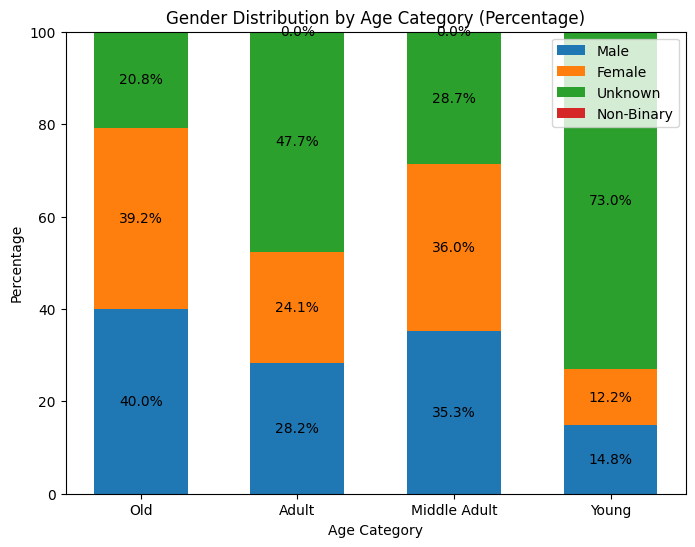

In [72]:

# Bar chart combining age_category and gender 



age_categories = df_Total['age_category'].unique()

# Calculate total counts for each age category
age_totals = np.array([df_Total[df_Total['age_category'] == age].shape[0] for age in age_categories])

# Calculate percentages for each gender
gender_percentages = {
    'Male': np.array([df_Total[(df_Total['age_category'] == age) & (df_Total['gendr'] == 'Male')].shape[0] / total * 100 for age, total in zip(age_categories, age_totals)]),
    'Female': np.array([df_Total[(df_Total['age_category'] == age) & (df_Total['gendr'] == 'Female')].shape[0] / total * 100 for age, total in zip(age_categories, age_totals)]),
    'Unknown': np.array([df_Total[(df_Total['age_category'] == age) & (df_Total['gendr'] == 'Unknown')].shape[0] / total * 100 for age, total in zip(age_categories, age_totals)]),
    'Non-Binary': np.array([df_Total[(df_Total['age_category'] == age) & (df_Total['gendr'] == 'Non-binary')].shape[0] / total * 100 for age, total in zip(age_categories, age_totals)])
}

width = 0.6  # width of the bars

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
bottom = np.zeros(len(age_categories))

for gender, percentages in gender_percentages.items():
    p = ax.bar(age_categories, percentages, width, label=gender, bottom=bottom)
    bottom += percentages
    ax.bar_label(p, label_type='center', fmt='%.1f%%')  # Display as percentage

ax.set_xlabel('Age Category')
ax.set_ylabel('Percentage')
ax.set_title('Gender Distribution by Age Category (Percentage)')
ax.legend()

plt.show()

#### Other Hypothesis

##### Test and Control group age comparison

1) We want to test whether the average age of clients engaging with the new process is the same as those engaging with the old process

**H0**: mu_age_control = mu_age_test

**H1**: mu_age_control != mu_age_test

In [73]:
experiment_web_df= pd.merge(df_web_exp, df_Total[['client_id', 'gendr', 'age_category', 'clnt_age', 'clnt_tenure_yr' ]], on='client_id', how='left')

In [74]:
import scipy.stats as st

client_age = df_Total[['client_id', 'variation', 'clnt_age']].dropna(subset=['variation', 'clnt_age']).drop_duplicates(subset=['client_id'])

control_age = client_age[client_age['variation'] == 'Control']['clnt_age']
test_age = client_age[client_age['variation'] == 'Test']['clnt_age']

stat, p_value = st.ttest_ind(test_age, control_age, equal_var=False, alternative='two-sided')

print("t-statistic:", stat)
print("p-value:", p_value)

t-statistic: -2.681593951496922
p-value: 0.007329659770374367


In [75]:
mu_age_control = control_age.mean()
mu_age_test = test_age.mean()
print(f'Tests average age: {mu_age_test}\nControl average age: {mu_age_control}')

mu_diff = mu_age_control - mu_age_test
print(f'The difference is {mu_diff}')

Tests average age: 46.87307178878671
Control average age: 47.2449005609383
The difference is 0.3718287721515878


#### Insight 

- We compared the average age of the **control group** and the **test group**.

- We used an independent two-sampled t-test. We chose this test because the two groups are independent and the age is a continuous variable. 

- From the test we conclude that there is a statistically difference (p-value: 0.007329659770374367) in the average age of both groups. The test group’s average age (46.87 years) is lower than the control group’s average age (47.24 years). However, this difference(0.37 years) is not practically meaningful.

##### Test and Control group gender 

3) We want to test if there are gender differences that affect engaging with the new or old process.


**H0**: Gender and engagement are independent (no difference)

**H1**: Gender and engagement are associated (gender matters)

In [77]:
# Completion rate per gender

started = set(df_Total.loc[df_Total["process_step"] == "start", "client_id"])

completed_by_gender = (
    df_Total[(df_Total["process_step"] == "confirm") & (df_Total["client_id"].isin(started))]
    .groupby(["variation", "gendr"])["client_id"]
    .nunique()
)

started_users_by_gender= (
    df_Total[df_Total["process_step"] == "start"]
    .groupby(["variation", "gendr"])["client_id"]
    .nunique()
)

completion_by_gender = completed_by_gender / started_users_by_gender
completion_by_gender

variation  gendr     
Control    Female        0.632106
           Male          0.663428
           Unknown       0.667252
Test       Female        0.664923
           Male          0.704063
           Non-binary         NaN
           Unknown       0.700412
Name: client_id, dtype: float64

In [78]:
completed_by_gender

variation  gendr  
Control    Female     4737
           Male       5257
           Unknown    5324
Test       Female     5719
           Male       6238
           Unknown    6455
Name: client_id, dtype: int64

In [79]:
contingency = completed_by_gender.unstack()

chi2, p_value, dof, expected = st.chi2_contingency(contingency)

print("Chi-square:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected counts:\n", expected)

Chi-square: 0.7420365649781351
p-value: 0.6900313259532941
Degrees of freedom: 2
Expected counts:
 [[4748.44375926 5220.29083902 5349.26540172]
 [5707.55624074 6274.70916098 6429.73459828]]


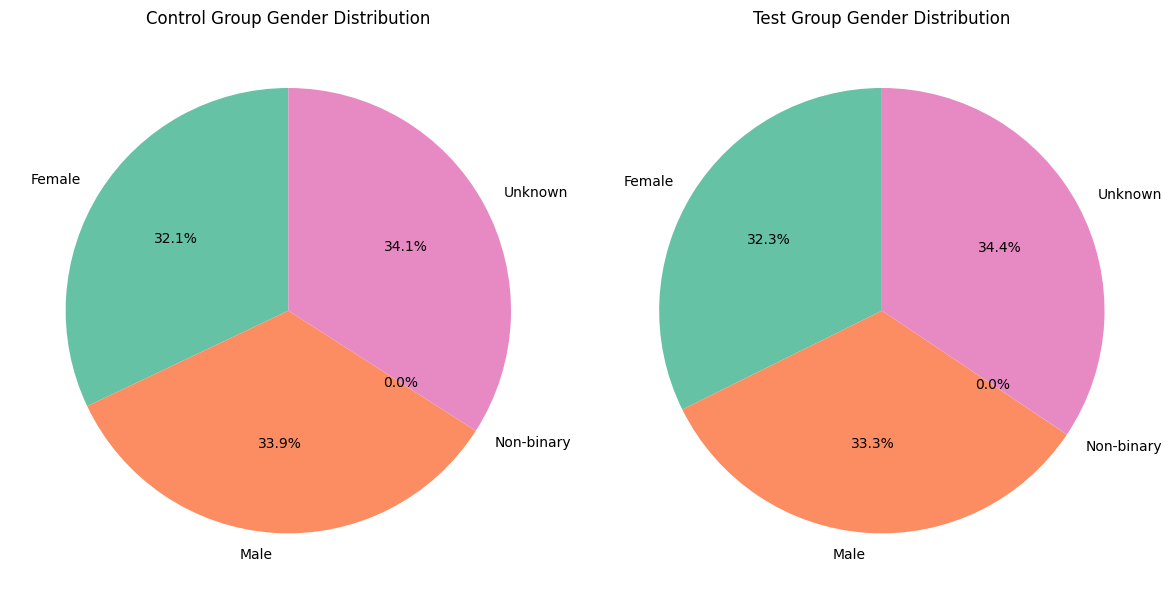

In [80]:
gender_var_counts = (
    experiment_web_df
    .drop_duplicates('client_id')
    .groupby(['variation', 'gendr'])
    .size()
    .unstack(fill_value=0)
)

control_counts = gender_var_counts.loc['Control']
test_counts = gender_var_counts.loc['Test']

# Labels for pie slices
labels = control_counts.index

# Colors (optional)
colors =['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Control pie
axes[0].pie(control_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
axes[0].set_title('Control Group Gender Distribution')

# Test pie
axes[1].pie(test_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Test Group Gender Distribution')

plt.tight_layout()
plt.show()

#### Insight 

Because the p-value is much larger than 0.05, we do not reject the null hypothesis.

The results show that there is no statistically significant evidence that gender is related to the way users engage / respond across the groups.

So we can conclude that:

- the distribution of outcomes is very similar across genders

- any differences observed are likely due to random variation

- gender does not appear to moderate engagement behavior in your dataset